<div style="text-align:center;font-size:22pt; font-weight:bold;color:white;border:solid black 1.5pt;background-color:#1e7263;">
    Understand the Input and First Hidden Dense Layer 
</div>

In [ ]:
# ======================================================================= #
# Course: Deep Learning Complete Course (CS-501)
# Author: Dr. Saad Laouadi
# Lesson: Impelementing Feed Forward Propagation
#
# ==========================================================
# Neural Network Fundamentals: From Theory to Implementation
# ==========================================================
## Core Concepts
# - **Neural network architecture**
# - **Feed-forward propagation**
# - **Dense layer mechanics**
# - **Weight/bias initialization**

# ## Mathematical Framework
# - **Matrix operations**
# - **Layer computations**
# - **Activation functions**
# - **Vectorized implementation**

# ## Implementation Methods
# - **NumPy**: Low-level understanding
# - **TensorFlow**: Performance optimization
# - **Keras**: Production-ready code

# ## Prerequisites
# - Python programming
# - Basic linear algebra
# - Elementary calculus

# ## Learning Objectives
# This guide will enable you to:
# 1. Implement neural networks from scratch.
# 2. Understand the input and dense layers.
# 3. Understand keras implementation
# =======================================================================
#.          Copyright © Dr. Saad Laouadi 2024
# =======================================================================

In [1]:
# 1. Environment Setup
# ------------------
import os  
from pprint import pprint                     # This will be used for printing dicts in a nicer format
# Disable Metal API Validation
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"

import numpy as np
import pandas as pd

# Import sympy of symbolic python
import sympy as sp

import tensorflow as tf
from tensorflow import keras


print("="*72)

%reload_ext watermark
%watermark -a "Dr. Saad Laouadi" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)

Author: Dr. Saad Laouadi

Last updated: 2024-12-03

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Imported Packages and Their Versions:
sympy     : 1.13.3
numpy     : 1.26.4
pandas    : 2.2.2
keras     : 3.6.0
tensorflow: 2.16.2



## Introduction

In this notebook, we'll learn how neural networks process information by examining their key building blocks. We'll start with the basics: how data enters the network, how weights and biases shape the learning process, and how layers work together to generate outputs.


You'll get hands-on experience building neural networks in three ways:
  - Using NumPy to understand the core mathematics
  - Using TensorFlow for efficient computation
  - Using Keras for rapid development

By implementing neural networks from scratch and with frameworks, you'll gain both deep understanding and practical skills. Let's begin by exploring how data flows through a neural network!

## Understanding Model Architecture

![Multi-layer perceptron](../../_Assets/Networks/MLP.png)

# Understanding Neural Network Layers and Implementation

### Input Layer
The input layer is your neural network's data entry point. It's designed to match your dataset's structure:
 - Number of neurons = Number of features in your data
 - Each neuron receives one feature value
 - No data transformation occurs here

Simple implementation with Keras:

```python
from tensorflow.keras.layers import Input
Input(shape = (nfeatures, ))
```

## Dense Layer (Fully Connected)
Dense layers learn patterns by connecting every neuron to all neurons in the next layer:
 - **units**: Number of neurons in the layer, determining its learning capacity
 - Each connection has a trainable weight
 - Each neuron has a bias term
 - Activation functions transform outputs

So, when you configure a Dense layer in a neural network, you're specifying the complexity of that layer in terms of neurons, which is independent of the number of features in your input data. The connection between the input layer and the first hidden layer (a Dense layer, in this case) involves weights that map each input neuron to each neuron in the Dense layer, forming a fully connected network structure.

Basic implementation:

```python
from tensorflow.keras.layers import Dense
dense_layer = Dense(units=64, activation='relu')  # 64 neurons with ReLU activation
```

In the coming sections, we'll implement these layers using different approaches to understand their inner workings.

## Understanding the Weights Matrix

The weights matrix defines connections between layers in a neural network:

#### Matrix Structure
 - Rows: Number of input features
 - Columns: Number of neurons in current layer
 - Shape Example: 3 input features → 4 neurons = [3,4] matrix

### Implementation Example

For a dense layer with 3 inputs and 4 neurons:
```python
weights_matrix = np.random.randn(3, 4)  # Shape: [n_inputs, n_neurons]
input_data = np.array([x1, x2, x3])     # 3 features
output = np.dot(input_data, weights_matrix)  # Matrix multiplication
```

### Matrix Operations
Each neuron's output is calculated by:

 1. Multiplying each input by its corresponding weight
 2. Summing these weighted values
 3. Adding a bias term
 4. Applying an activation function

This structure enables the network to learn complex patterns by adjusting weights during training.

## Manual Example 

In this example we will generate input data, weights and biases randomly, and perform the feed forward propagation to computer the hidden layer output. 

In [2]:
# Create random input data of shape (5, 3) - 5 samples with 3 features each

# Set the seed for reproducibility
np.random.seed(0)

# Generate random integer data
input_data = np.random.choice([*range(21)], size = (5,3))  


# Display the data in the symbolic form
sp.Matrix(input_data)

Matrix([
[12, 15,  0],
[ 3,  3,  7],
[ 9, 19, 18],
[ 4,  6, 12],
[ 1,  6,  7]])

In [3]:
# Define random weights for 4 nodes in the hidded layer, each connecting to 3 input features
np.random.seed(0)

weights = np.random.choice([*range(5)], size = (3,4))  # 3 input features, 4 units in Dense layer

# Display the weights Matrix
sp.Matrix(weights)

Matrix([
[4, 0, 3, 3],
[3, 1, 3, 2],
[4, 0, 0, 4]])

In [4]:
# Define random biases for each of the 4 nodes
np.random.seed(0)

biases = np.random.choice([*range(5)], size = 4)  # 4 units in Dense layer
print(biases.shape)

# Display the biases Vector
sp.Matrix(biases)

(4,)


Matrix([
[4],
[0],
[3],
[3]])

## How the Calculations is Performed (Manually)

Here's how the first row of the output matrix is calculated step by step:

1. **Input Data (First Row)**: 

$$
\displaystyle \left[\begin{matrix}12 & 15 & 0\\3 & 3 & 7\\9 & 19 & 18\\4 & 6 & 12\\1 & 6 & 7\end{matrix}\right]
$$

2. **Weights Matrix**:
   $$
 \displaystyle \left[\begin{matrix}4 & 0 & 3 & 3\\3 & 1 & 3 & 2\\4 & 0 & 0 & 4\end{matrix}\right]
   $$

3. **Biases Vector**: $$\displaystyle \left[\begin{matrix}4\\0\\3\\3\end{matrix}\right]$$

4. **Calculation of Output for the First Row**: The output is calculated as the **dot product** of the input row and the weights matrix, plus the biases.

   $$
   \text{First Output} = \begin{bmatrix} 12 & 15 & 0 \end{bmatrix}
   \begin{bmatrix}
   4 & 0 & 3 & 3 \\
   3 & 1 & 3 & 2 \\
   4 & 0 & 0 & 4
   \end{bmatrix} + \displaystyle \left[\begin{matrix}4\\0\\3\\3\end{matrix}\right]
   $$

   This results in:
   $$
   \begin{bmatrix} (12 \times 4) + (15 \times 3) + (0 \times 4) + 4, & (12 \times 0) + (15 \times 1) + (0 \times 0) + 0, & (12 \times 3) + (15 \times 3) + (0 \times 0) + 3, & (12 \times 3) + (15 \times 2) + (0 \times) 4 + 3 \end{bmatrix}
   $$

   Which simplifies to:
   $$
   \begin{bmatrix} 97, & 15, & 84, & 69 \end{bmatrix}
   $$

1. **First Row of Input**: `[12, 15, 0]`
   - Output Calculation:
     $$
     \begin{align*}
     (12 \times 4) + (15 \times 3) + (0 \times 4) + 4 &= 48 + 45 + 0 + 4 &= 97 \\
     (12 \times 0) + (15 \times 1) + (0 \times 0) + 0 &= 0 + 15 + 0 + 0 &= 15 \\
     (12 \times 3) + (15 \times 3) + (0 \times 0) + 3 &= 36 + 45 + 0 + 3 &= 84 \\
     (12 \times 3) + (15 \times 2) + (0 \times 4) + 3 &= 36 + 30 + 0 + 3 &= 69
     \end{align*}
     $$
   - First Row of Output: `[97, 15, 84, 69]`

2. **Second Row of Input**: `[3, 3, 7]`
   - Output Calculation:
     $$
     \begin{align*}
     (3 \times 4) + (3 \times 3) + (7 \times 4) + 4 &= 12 + 9 + 28 + 4 &= 53 \\
     (3 \times 0) + (3 \times 1) + (7 \times 0) + 0 &= 0 + 3 + 0 + 0 &= 3 \\
     (3 \times 3) + (3 \times 3) + (7 \times 0) + 3 &= 9 + 9 + 0 + 3 &= 21 \\
     (3 \times 3) + (3 \times 2) + (7 \times 4) + 3 &= 9 + 6 + 28 + 3 &= 46
     \end{align*}
     $$
   - Second Row of Output: `[53, 3, 21, 46]`

3. **Third Row of Input**: `[9, 19, 18]`
   - Output Calculation:
     $$
     \begin{align*}
     (9 \times 4) + (19 \times 3) + (18 \times 4) + 4 &= 36 + 57 + 72 + 4 &= 169 \\
     (9 \times 0) + (19 \times 1) + (18 \times 0) + 0 &= 0 + 19 + 0 + 0 &= 19 \\
     (9 \times 3) + (19 \times 3) + (18 \times 0) + 3 &= 27 + 57 + 0 + 3 &= 87 \\
     (9 \times 3) + (19 \times 2) + (18 \times 4) + 3 &= 27 + 38 + 72 + 3 &= 140
     \end{align*}
     $$
   - Third Row of Output: `[169, 19, 87, 140]`

4. **Fourth Row of Input**: `[4, 6, 12]`
   - Output Calculation:
     $$
     \begin{align*}
     (4 \times 4) + (6 \times 3) + (12 \times 4) + 4 &= 16 + 18 + 48 + 4 &= 86 \\
     (4 \times 0) + (6 \times 1) + (12 \times 0) + 0 &= 0 + 6 + 0 + 0 &= 6 \\
     (4 \times 3) + (6 \times 3) + (12 \times 0) + 3 &= 12 + 18 + 0 + 3 &= 33 \\
     (4 \times 3) + (6 \times 2) + (12 \times 4) + 3 &= 12 + 12 + 48 + 3 &= 75
     \end{align*}
     $$
   - Fourth Row of Output: `[86, 6, 33, 75]`

5. **Fifth Row of Input**: `[1, 6, 7]`
   - Output Calculation:
     $$
     \begin{align*}
     (1 \times 4) + (6 \times 3) + (7 \times 4) + 4 &= 4 + 18 + 28 + 4 &= 54 \\
     (1 \times 0) + (6 \times 1) + (7 \times 0) + 0 &= 0 + 6 + 0 + 0 &= 6 \\
     (1 \times 3) + (6 \times 3) + (7 \times 0) + 3 &= 3 + 18 + 0 + 3 &= 24 \\
     (1 \times 3) + (6 \times 2) + (7 \times 4) + 3 &= 3 + 12 + 28 + 3 &= 46
     \end{align*}
     $$
   - Fifth Row of Output: `[54, 6, 24, 46]`
   
## The Result Matrix

$$
\displaystyle \left[\begin{matrix}97 & 15 & 84 & 69\\53 & 3 & 21 & 46\\169 & 19 & 87 & 140\\86 & 6 & 33 & 75\\54 & 6 & 24 & 46\end{matrix}\right]
$$

## Confirm the Results Pythonically 

In [5]:
# Define a function to process each sample through the hidden layer
def process_data(sample, weights, biases):
    return np.dot(sample, weights) + biases

# Process each sample and print the results
for i, sample in enumerate(input_data):
    print(f"This is the input for sample {i + 1}: {sample}")
    output = process_data(sample, weights, biases)
    print(f"Output from the 4 nodes for this sample: {output}\n")
    
# The entire dataset in one step
process_data(input_data, weights, biases)

This is the input for sample 1: [12 15  0]
Output from the 4 nodes for this sample: [97 15 84 69]

This is the input for sample 2: [3 3 7]
Output from the 4 nodes for this sample: [53  3 21 46]

This is the input for sample 3: [ 9 19 18]
Output from the 4 nodes for this sample: [169  19  87 140]

This is the input for sample 4: [ 4  6 12]
Output from the 4 nodes for this sample: [86  6 33 75]

This is the input for sample 5: [1 6 7]
Output from the 4 nodes for this sample: [54  6 24 46]



array([[ 97,  15,  84,  69],
       [ 53,   3,  21,  46],
       [169,  19,  87, 140],
       [ 86,   6,  33,  75],
       [ 54,   6,  24,  46]])

## Keras Calculation Confirmation

Here we will confirm the previous calculations using Keras API. In the next section, I will walk you through each step in detail. Now, have faith in me:

In [6]:
# Input necessary Tools
from keras.models import Sequential
from keras.layers import Input, Dense

# Create the Keras model
model = Sequential()

# Declare the input layer
model.add(Input(shape = (3, )))

# Add the hidden layer
model.add(Dense(units=4, activation="linear"))

# Set the dummy weights and biases generated in the example above
model.layers[0].set_weights([weights, biases])

# Use the model to predict the output
keras_outputs = model.predict(input_data)

# print the keras results
print(keras_outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[ 97.  15.  84.  69.]
 [ 53.   3.  21.  46.]
 [169.  19.  87. 140.]
 [ 86.   6.  33.  75.]
 [ 54.   6.  24.  46.]]


In [7]:
# Compare the results now
manual_outputs = np.dot(input_data, weights) + biases
# Compare the results
print("Manual Outputs:")
print(manual_outputs)

print("\nKeras Outputs:")
print(keras_outputs)

Manual Outputs:
[[ 97  15  84  69]
 [ 53   3  21  46]
 [169  19  87 140]
 [ 86   6  33  75]
 [ 54   6  24  46]]

Keras Outputs:
[[ 97.  15.  84.  69.]
 [ 53.   3.  21.  46.]
 [169.  19.  87. 140.]
 [ 86.   6.  33.  75.]
 [ 54.   6.  24.  46.]]


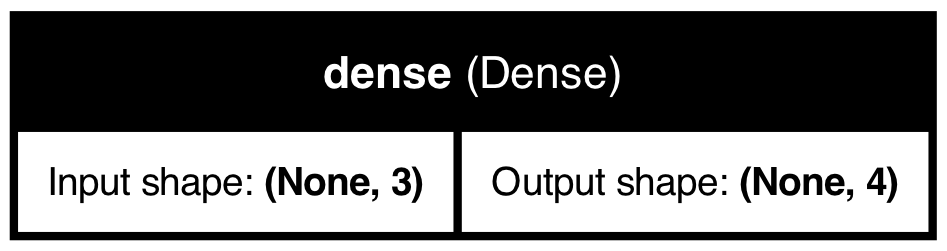

In [8]:
# Plot the model
from tensorflow.keras import utils
# Plot the model
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Example with Keras API

We can go through a simple example step by step to understand how Keras processes data. In this tutorial, I'll guide you through the process and demonstrate how you can perform this example.

Here are the steps we will follow:

1. **Create Random Input Data:** We'll generate a random data array of shape (5, 3) - meaning 5 samples, each with 3 features.
2. **Define a Keras Model:** We'll create a Keras model with a single Dense layer. This layer will have 4 nodes (neurons), and we'll use a linear activation function for simplicity.
3. **Initialize Random Weights:** We'll initialize the weights and biases for this layer randomly. In Keras, this is usually handled automatically, but you can also set custom weights.
4. **Perform a Forward Pass:** We'll pass the input data through the network to see how the data is transformed.
5. **Output the Results:** Finally, we'll observe the output of the network.

Here's how you can implement this:

## Step 1: Create Random Input Data
We will use tensorflow to generate the random input data:

In [10]:
# Create random input data of shape (5, 3)
# ========================================

#1. Set the seed to reproducibitity
tf.random.set_seed(0)

input_data = tf.round(tf.random.uniform(shape = (5, 3),
                      minval=-5, maxval=5))

# print the data
print(input_data)

# you can print the results from numpy
print()
print("Print Tensorflow values as numpy arrays")
print(input_data.numpy())

tf.Tensor(
[[-2. -3.  0.]
 [ 1. -1.  3.]
 [-0.  5.  2.]
 [-4.  2.  2.]
 [ 1. -1. -1.]], shape=(5, 3), dtype=float32)

Print Tensorflow values as numpy arrays
[[-2. -3.  0.]
 [ 1. -1.  3.]
 [-0.  5.  2.]
 [-4.  2.  2.]
 [ 1. -1. -1.]]


## Step 2: Define a Keras Model
Create a simple Keras model with one Dense layer:

In [11]:
# ========================================================== #
# Note: This should be imported at the top of this notebook  #
#.      I am importing them here for educational purposese   #
# ========================================================== #
# Import the Sequential model
from tensorflow.keras.models import Sequential

# Import the Input, and Dense Layers
from tensorflow.keras.layers import Input, Dense

In [12]:
# Define the sequential model
model = Sequential(name = "SimpleSeqModel")           

# Add the input layere with shape (3, ) `(3 input features, )`
model.add(Input(shape=(3, )))

# Check the model config
pprint(model.get_config())

# Chech the model summary()
print(model.summary())

# Check the model weights
print(model.get_weights())

# check the model layers 
print(model.layers)

{'dtype': {'class_name': 'DTypePolicy',
           'config': {'name': 'float32'},
           'module': 'keras',
           'registered_name': None},
 'layers': [{'class_name': 'InputLayer',
             'config': {'batch_shape': (None, 3),
                        'dtype': 'float32',
                        'name': 'input_layer_1',
                        'sparse': False},
             'module': 'keras.layers',
             'registered_name': None}],
 'name': 'SimpleSeqModel',
 'trainable': True}


Model: "SimpleSeqModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
[]
[]


In [13]:
# Add a `Dense (fully connected)` hidden layer 
model.add(Dense(units=4, activation = 'relu', name = "DenseHiddenLayer"))
# Get the model summary 
print(model.summary())

Model: "SimpleSeqModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ DenseHiddenLayer (Dense)        │ (None, 4)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Get the model weights
print(model.get_weights())

[array([[-0.27734601, -0.38029772,  0.6721395 , -0.08188719],
       [-0.4336716 , -0.41975152,  0.7950572 ,  0.46018624],
       [-0.12449813, -0.02797145,  0.8630729 , -0.07730216]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]


In [15]:
# Check the model weights shape
print("The model's weights shape is:", model.get_weights()[0].shape)

# Get the layers
print(model.layers)

The model's weights shape is: (3, 4)
[<Dense name=DenseHiddenLayer, built=True>]


In [16]:
# Get the model build configuration
print(model.get_build_config())

{'input_shape': (None, 3)}


In [17]:
# Check the model configuration again
pprint(model.get_config())

{'build_input_shape': (None, 3),
 'dtype': {'class_name': 'DTypePolicy',
           'config': {'name': 'float32'},
           'module': 'keras',
           'registered_name': None},
 'layers': [{'class_name': 'InputLayer',
             'config': {'batch_shape': (None, 3),
                        'dtype': 'float32',
                        'name': 'input_layer_1',
                        'sparse': False},
             'module': 'keras.layers',
             'registered_name': None},
            {'build_config': {'input_shape': (None, 3)},
             'class_name': 'Dense',
             'config': {'activation': 'relu',
                        'bias_constraint': None,
                        'bias_initializer': {'class_name': 'Zeros',
                                             'config': {},
                                             'module': 'keras.initializers',
                                             'registered_name': None},
                        'bias_regularizer': None,
 

In [18]:
# Get the model name
model.name

'SimpleSeqModel'

## Step 3: Initialize Random Weights (Optional)
Keras automatically initializes weights and biases, but if you want to set them manually:

In [19]:
# Example of setting custom weights (optional)
np.random.seed(101)
weights = np.random.rand(3, 4)                  # Random weights (input features, output nodes)
biases = np.random.rand(4)                      # Random biases (one for each output node)
model.layers[0].set_weights([weights, biases])

# print the weights
print(weights)
print(biases)

[[0.51639863 0.57066759 0.02847423 0.17152166]
 [0.68527698 0.83389686 0.30696622 0.89361308]
 [0.72154386 0.18993895 0.55422759 0.35213195]]
[0.1818924  0.78560176 0.96548322 0.23235366]


In [20]:
model.get_weights()

[array([[0.5163986 , 0.57066756, 0.02847423, 0.17152166],
        [0.685277  , 0.8338969 , 0.30696622, 0.8936131 ],
        [0.72154385, 0.18993895, 0.5542276 , 0.35213196]], dtype=float32),
 array([0.18189241, 0.78560174, 0.96548325, 0.23235366], dtype=float32)]

## Step 4: Perform a Forward Pass
Pass the input data through the network:

In [21]:
# Perform a forward pass by calling model directly on the input data
hidden_layer_values = model(input_data, training = False)

# Display the values
print(hidden_layer_values.numpy())

# Display the shape of the hidden layer result
print(hidden_layer_values.numpy().shape)

[[0.         0.         0.         0.        ]
 [2.1776457  1.0921893  2.349674   0.56665814]
 [5.051365   5.334964   3.6087694  5.404683  ]
 [0.9299395  0.55060303 2.573974   2.0377572 ]
 [0.         0.33243352 0.13276368 0.        ]]
(5, 4)


In [22]:
# Perform a forward pass using the predict method
output = model.predict(input_data)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.         0.         0.         0.        ]
 [2.1776457  1.0921893  2.349674   0.56665814]
 [5.051365   5.334964   3.6087694  5.404683  ]
 [0.9299395  0.55060303 2.573974   2.0377572 ]
 [0.         0.33243352 0.13276368 0.        ]]


## Step 5: Output the Results
Print the output to see the transformed data:

In [23]:
print("Output of the network:")
print(output)

Output of the network:
[[0.         0.         0.         0.        ]
 [2.1776457  1.0921893  2.349674   0.56665814]
 [5.051365   5.334964   3.6087694  5.404683  ]
 [0.9299395  0.55060303 2.573974   2.0377572 ]
 [0.         0.33243352 0.13276368 0.        ]]


In these steps, you'll see how Keras processes the input data through the Dense layer, applying the weights and biases, and producing the output. Remember, this is a linear model for simplicity; in real-world scenarios, you would typically use non-linear activation functions and multiple layers.

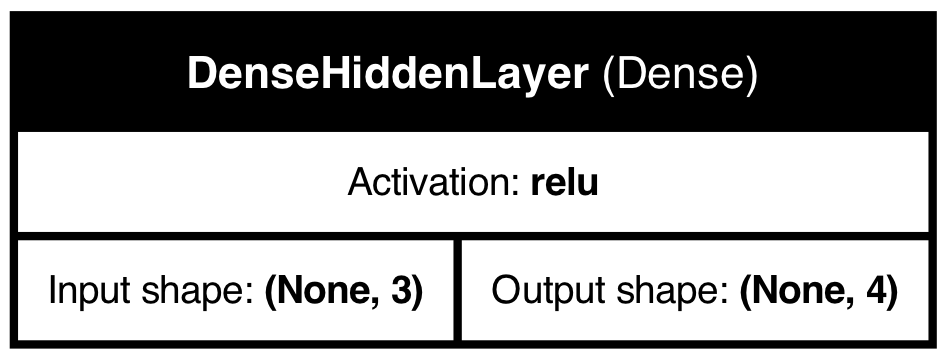

In [24]:
# print the model 
utils.plot_model(model, to_file='model_plot.png', 
                 show_shapes=True,
                 show_layer_names=True,
                 show_layer_activations=True
                )

---

## Advanced Example 

In this example we will follow the same the steps as above, but with more data and with bigger model. Here is the network configuaration:

1. Input layer: 10 features with 1000 samples
2. Dense hidden layer with 100 nodes.

In [25]:
# Create random input data of shape (1000, 10) - 1000 samples with 10 features each
np.random.seed(0)
input_data = np.random.rand(1000, 10)

# Define random weights for 100 nodes in the hidden layer, each connecting to 10 input features
np.random.seed(0)
weights = np.random.rand(10, 100)  # 10 input features, 100 nodes

# Define random biases for each of the 4 nodes
np.random.seed(0)
biases = np.random.rand(100)

# Function to process each sample through the input layer
def process_sample(sample, weights, biases):
    return np.dot(sample, weights) + biases

# Process each sample and print the results
for i, sample in enumerate(input_data):
    print(f"This is the input for sample {i + 1}: {sample}")
    output = process_sample(sample, weights, biases)
    print(f"Output from the 4 nodes for this sample: {output}\n")
    # stop after 5 iterations
    if i >= 5:
        break

This is the input for sample 1: [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
Output from the 4 nodes for this sample: [3.14585254 3.86917582 3.09394383 3.06000465 3.23363556 3.70250576
 3.60458634 2.85380978 4.01084342 3.83518449 3.67084524 3.30971872
 4.09839471 3.74513591 2.1849296  2.32573017 2.23359749 3.74509344
 4.63906382 5.33232747 4.87044616 4.13752373 2.68712338 4.40399998
 2.20737271 5.08432455 3.22066661 4.83895466 4.28962303 2.50785725
 2.62575056 3.13542464 2.99658233 3.06494679 3.08610459 4.11705437
 3.62805143 3.09635217 3.92054494 4.12539377 2.94490182 3.41608501
 3.29780098 2.6272798  4.51803891 3.08797366 3.88452739 3.53078952
 4.01917525 3.99847541 3.61848713 4.19758599 3.73702704 3.02697738
 3.66951276 3.06065596 3.40461387 2.22965872 3.40278196 3.4713028
 3.4459553  3.20767586 3.39419411 3.4449069  3.97607364 4.64209944
 3.89016909 2.71831962 5.28486383 3.46342537 5.5876086  2.54798637
 3.98888868

In [26]:
# Perform the previous network with Keras

# Define the model
model = Sequential()

# Declare the input layer
model.add(Input(shape = (10, )))    # 10 features

# Define the Dense layer
model.add(Dense(units=100, activation="linear"))

# Set the weights and biases for the model 
model.set_weights([weights, biases])

# Perform the calculation
output = model(input_data, training = False)

# Print the output
print(output)

tf.Tensor(
[[3.1458528 3.869176  3.0939436 ... 2.5903811 3.194808  3.3060915]
 [3.464421  3.627668  2.6270812 ... 2.5669637 2.8645635 2.4095964]
 [3.459831  3.6407661 3.0366118 ... 2.2162766 3.034803  2.70679  ]
 ...
 [3.4097826 3.5450325 2.8534663 ... 2.4602275 2.3702006 2.8370848]
 [4.2145224 4.584774  3.4791    ... 3.0798218 3.3190851 3.9857569]
 [2.814345  3.0336947 2.1704092 ... 1.7996008 2.5137367 2.4240122]], shape=(1000, 100), dtype=float32)


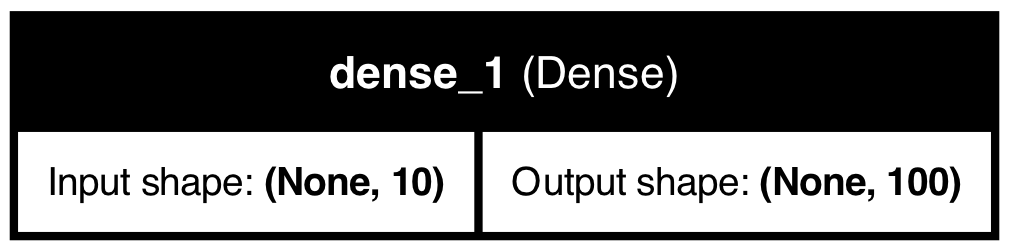

In [27]:
# plot the model
utils.plot_model(model,
                 show_shapes=True,
                 show_layer_names=True)

In [28]:
# Save the model
# model.save("my_keras_model.keras")

## Plotting the Model with Netron

url = https://github.com/lutzroeder/netron